1- get the performance of FL : global model accuracy through  rounds

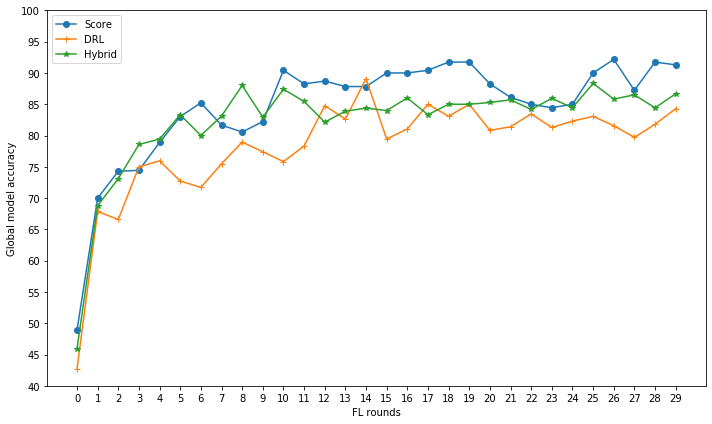

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df_score = pd.read_csv('../results/score_drp60_mlc10/models.csv') 
df_drl = pd.read_csv('../results/drl_drp60_mlc10/models.csv') 
df_hybrid = pd.read_csv('../results/hybrid_drp60_mlc10/models.csv') 


filtered_score = df_score[df_score['type'] == 2]
filtered_score = filtered_score[1:]

filtered_drl = df_drl[df_drl['type'] == 2]
filtered_drl = filtered_drl[1:]

filtered_hybrid = df_hybrid[df_hybrid['type'] == 2]
filtered_hybrid = filtered_hybrid[1:]

# Extract accuracy values
accuracies_score = filtered_score['accuracy']
accuracies_drl = filtered_drl['accuracy']
accuracies_hybrid = filtered_hybrid['accuracy']

index = filtered_score['round']

# print(accuracies_score)
# print(accuracies_drl)
# print(accuracies_hybrid)


# Create a line plot
fig = plt.figure(figsize=(10, 6))
plt.plot(index, accuracies_score, marker='o', label="Score")
plt.plot(index, accuracies_drl, marker='+', label="DRL")
plt.plot(index, accuracies_hybrid, marker='*', label="Hybrid")

# plt.title("comparaison des trois approches")
plt.xlabel('FL rounds')
plt.ylabel('Global model accuracy')
plt.yticks(range(40, 101, 5))
plt.xticks(range(0,30, 1))
plt.legend()
plt.tight_layout()
plt.show()


image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'comparaison_dropout60_scen3.svg'

fig.savefig(image_name, format=image_format, dpi=1200)

Score d'honnetete de l'approche par score:

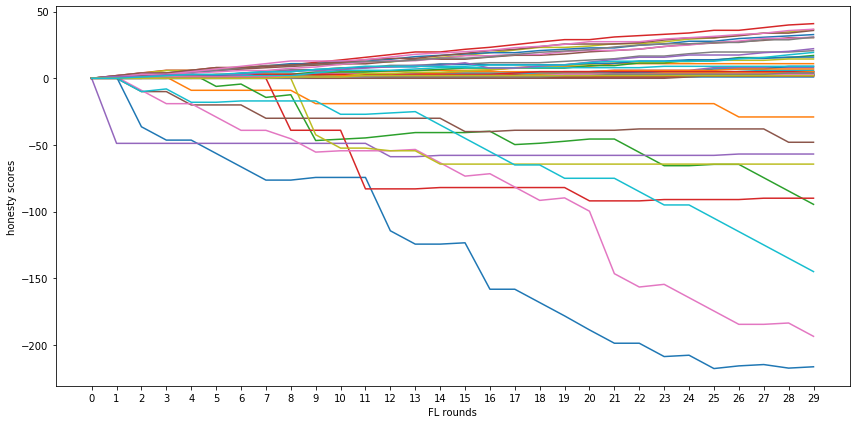

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open("../results/drl_50/blockchain.json",'r') as f:
    data = json.load(f)

# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

#  Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

fig = plt.figure(figsize=(12, 6))


# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(index, honesty_values)

plt.xlabel('FL rounds')
plt.ylabel("honesty scores")
plt.tight_layout()
# plt.yticks(range(-40, 40, 20))
plt.xticks(range(0,30, 1))


# Show or save the plot
plt.show()

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'honesty_hybrid.svg'

fig.savefig(image_name, format=image_format, dpi=1200)

score d'honnetete du DRL

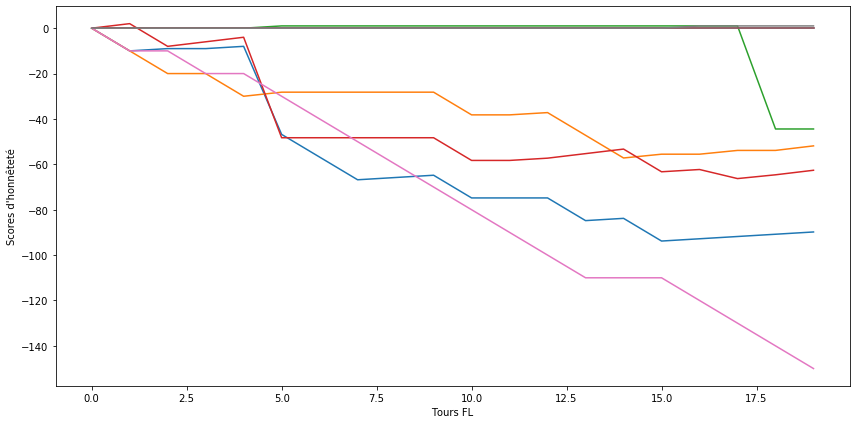

In [36]:

with open("../demo/drl/blockchain.json",'r') as f:
    data = json.load(f)

# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

#  Specify the node IDs you want to include on the plot
specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))


# Plot honesty values for each node
for node_id in specific_node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(index, honesty_values)

plt.xlabel('Tours FL')
plt.ylabel("Scores d'honnêteté")
plt.tight_layout()

# Show or save the plot
plt.show()

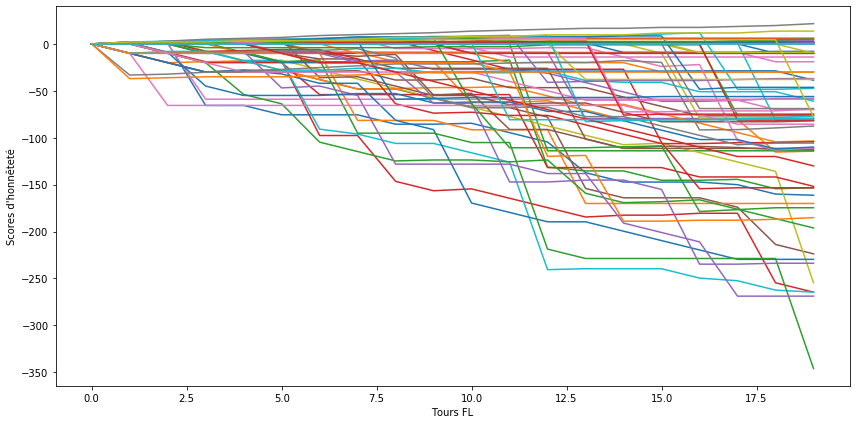

In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open("../demo/hybrid/blockchain.json",'r') as f:
    data = json.load(f)

# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

#  Specify the node IDs you want to include on the plot
# specific_node_ids = [11,17,38,37,77,95,86,97]  # Add the node IDs you want to display

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())

block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))


# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(index, honesty_values)

plt.xlabel('Tours FL')
plt.ylabel("Scores d'honnêteté")
plt.tight_layout()

# Show or save the plot
plt.show()


Fonction de recompense du DRL

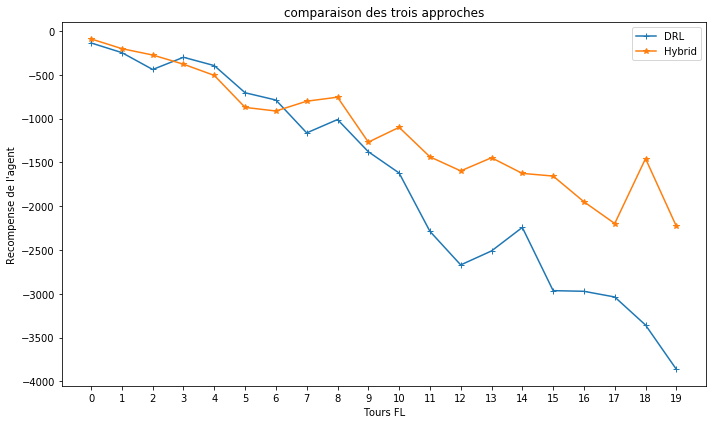

In [34]:
import pandas as pd
import matplotlib.pyplot as plt



df_drl = pd.read_csv('../demo/drl/reward.csv') 
df_hybrid = pd.read_csv('../demo/hybrid/reward.csv') 


# Extract accuracy values

reward_drl = df_drl['Reward']
reward_hybrid = df_hybrid['Reward']

index = filtered_score['round']


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(index, reward_drl, marker='+', label="DRL")
plt.plot(index, reward_hybrid, marker='*', label="Hybrid")

plt.title("comparaison des trois approches")
plt.xlabel('Tours FL')
plt.ylabel("Recompense de l'agent")
# plt.yticks(range(0, 101, 5))
plt.xticks(range(0,20, 1))
plt.legend()
plt.tight_layout()
plt.show()

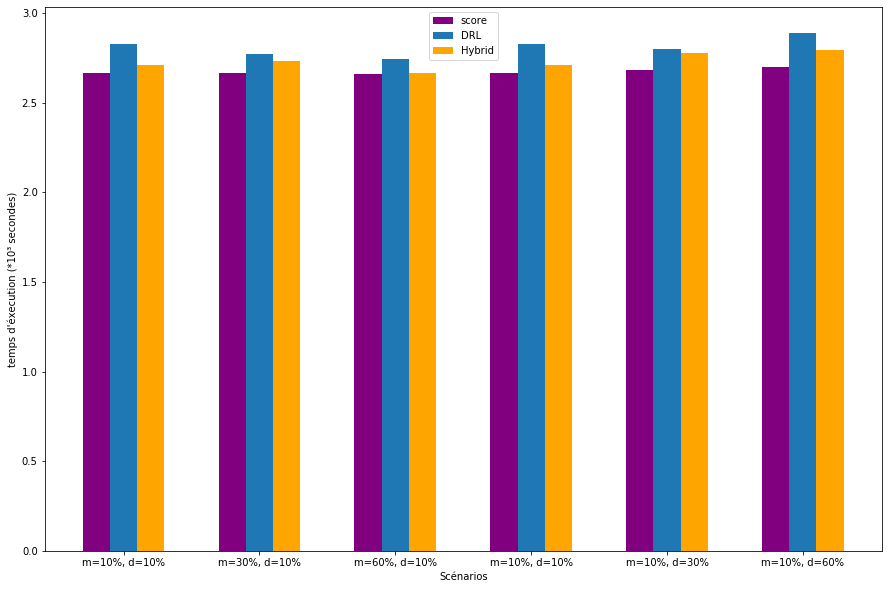

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace these lists with your own data)
# 01 01, 0.1 0.3, 0.1 0.6, 0.1 0.1, 0.3 0.1, 0.6 0.1
score = [2.66723, 2.66717, 2.65924, 2.66723, 2.68218, 2.69829] 
drl = [2.82923, 2.77322, 2.74625, 2.82923 , 2.80126, 2.88925]
hybride = [2.71227, 2.73324, 2.66424, 2.71227, 2.77925, 2.79321]

# Create an array of x-values for the bars
x_labels = ["m=10%, d=10%","m=30%, d=10%", "m=60%, d=10%", "m=10%, d=10%", "m=10%, d=30%","m=10%, d=60%"]
x = np.arange(len(score))
# Set the width of the bars
width = 0.2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Create bar plots for each dataset
ax.bar(x - width, score, width, label='score', color="purple")
ax.bar(x, drl, width, label='DRL')
ax.bar(x + width, hybride, width, label='Hybrid', color="orange")

# Set labels for the x-axis
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

# Set the title and labels for the axes
# ax.set_title('Bar Plot of Three Data Sets')
ax.set_xlabel('Scénarios')
ax.set_ylabel("temps d'éxecution (*10³ secondes)")

# Add a legend
ax.legend()

# Show the plot
plt.show()
